In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes

In [2]:
def get_years_dfs(misinfotext_path: str, fakespeak_path: str):
    misinfotext_file = pd.ExcelFile(misinfotext_path)
    
    for year in misinfotext_file.sheet_names:
        df = pd.read_excel(misinfotext_file, sheet_name=year)
        
        df["year"] = year
        df["proportion"] = df["ngram_count"] / df["ngram_count"].sum()
        
        yield df
    
    fakespeak_file = pd.ExcelFile(fakespeak_path)
    
    for year in fakespeak_file.sheet_names:
        df = pd.read_excel(fakespeak_file, sheet_name=year)
        
        df["year"] = year
        df["proportion"] = df["ngram_count"] / df["ngram_count"].sum()
        
        yield df

def get_full_df(misinfotext_path: str, fakespeak_path: str):
    return pd.concat(get_years_dfs(misinfotext_path, fakespeak_path))

In [3]:
def get_ranked_proportion_df(df: pd.DataFrame):
    return  df\
            .groupby(["ngram_text", "n"])["proportion"]\
            .sum()\
            .reset_index()\
            .sort_values(
                by=["n", "proportion"], 
                ascending=[True, False]
            )

In [4]:
def get_ngram_proportion_in_year(df: pd.DataFrame, year: str, ngram: str):
    matches = df[(df["year"] == year) & (df["ngram_text"] == ngram)]
    
    if matches.shape[0] == 0:
        return 0
    
    return matches["proportion"].iloc[0]

In [5]:
NUM_NGRAMS = 5

def save_ngrams_over_years_plot(df: pd.DataFrame, ranked_prop_df: pd.DataFrame, title_template: str, save_path: str):
    fig, axes = plt.subplots(
        nrows=5, ncols=1, 
        figsize=(20, 40), 
        squeeze=False)

    fig.suptitle(title_template.replace("NUM_NGRAMS", str(NUM_NGRAMS)), fontsize=16)
    fig.subplots_adjust(top=0.95)

    axes_flat: list[Axes] = axes.flatten()

    for n in range(1, 6):
        top_ngrams: list[str] = ranked_prop_df[ranked_prop_df["n"] == n]["ngram_text"].head(NUM_NGRAMS)

        ax = axes_flat[n - 1]
        
        ax.set_title(f"n = {n}")

        ax.set_xlabel("year")
        ax.set_ylabel("proportion of total n-gram counts")

        ax.grid(True)
        ax.tick_params(axis="x", rotation=45)
        
        years = range(2009, 2025)

        for ngram in top_ngrams:
            data = [
                    get_ngram_proportion_in_year(df, str(year), ngram)
                    for year in years
            ]

            ax.plot(years, data, marker="o")
            
            ax.set_xticks(list(years))
            ax.set_xticklabels([str(y) for y in years])
        
        ax.legend(top_ngrams)

    plt.draw()
    plt.savefig(save_path)

    plt.show()

In [6]:
def load_and_save_ngram_plots(misinfotext_path: str, fakespeak_path: str, title_template: str, save_path: str):
    full_df = get_full_df(
        misinfotext_path=misinfotext_path,
        fakespeak_path=fakespeak_path
    )
    
    ranked_proportion_df = get_ranked_proportion_df(full_df)
    
    save_ngrams_over_years_plot(
        df=full_df,
        ranked_prop_df=ranked_proportion_df,
        title_template=title_template,
        save_path=save_path
    )

### Generate line plots for ngrams in body text

All text types

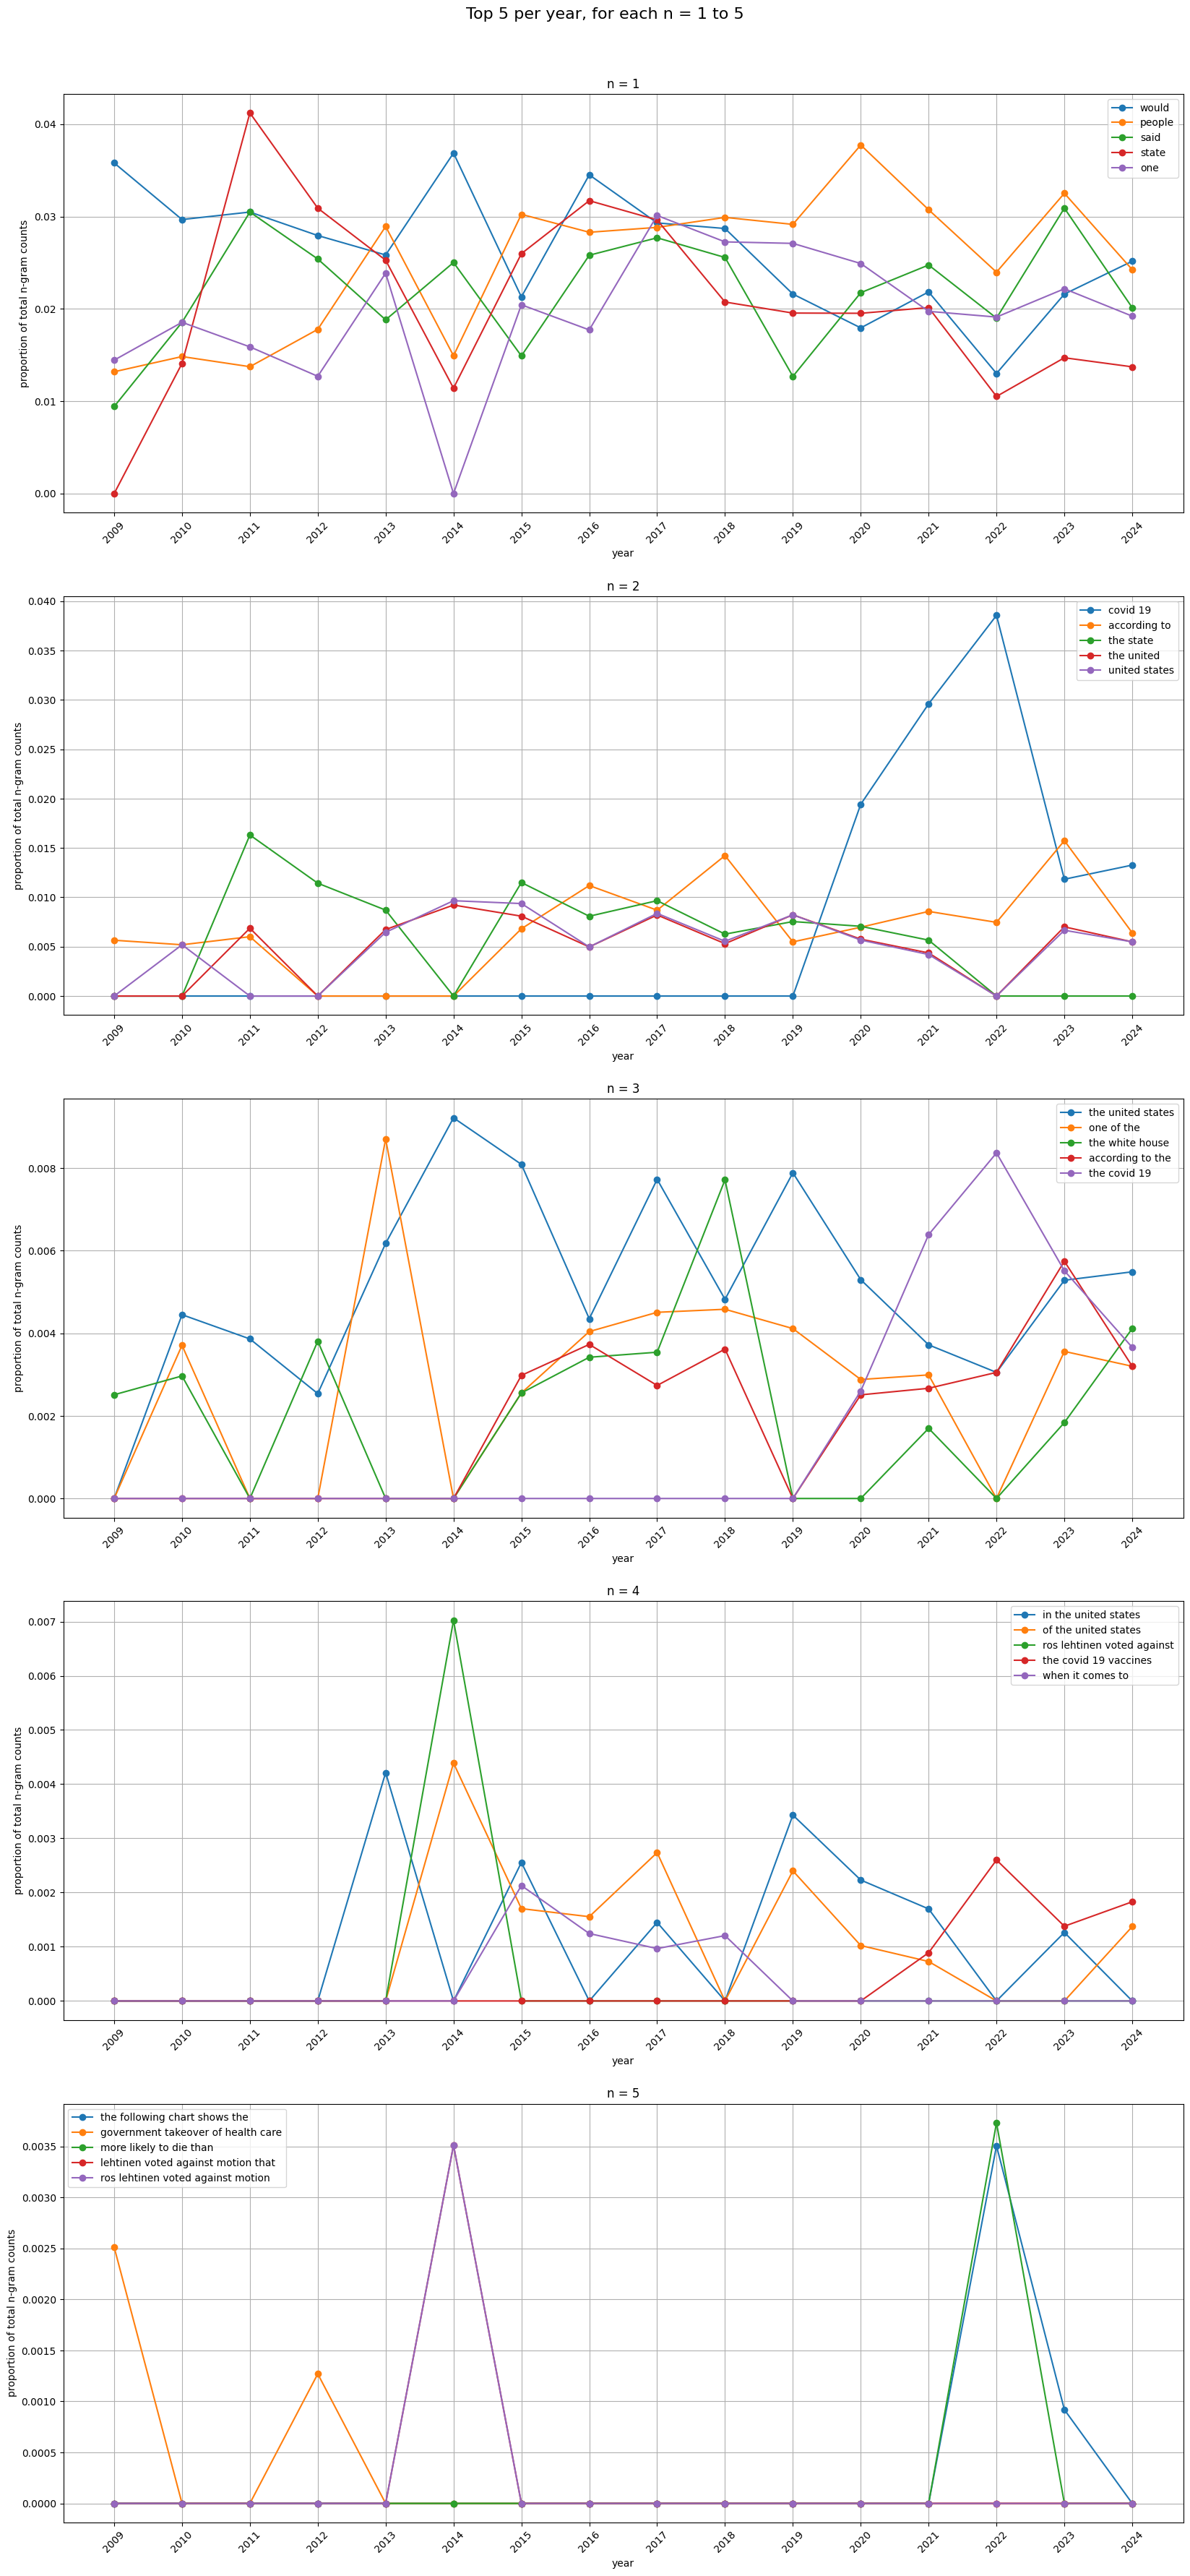

In [7]:
load_and_save_ngram_plots(
    misinfotext_path="./data/MisInfoText/Analysis_output/MisInfoText_ngrams.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/Fakespeak_ngrams.xlsx",
    title_template="Top NUM_NGRAMS per year, for each n = 1 to 5",
    save_path="./visualization/ngrams/plots_over_time/full.png"
)

News and blog

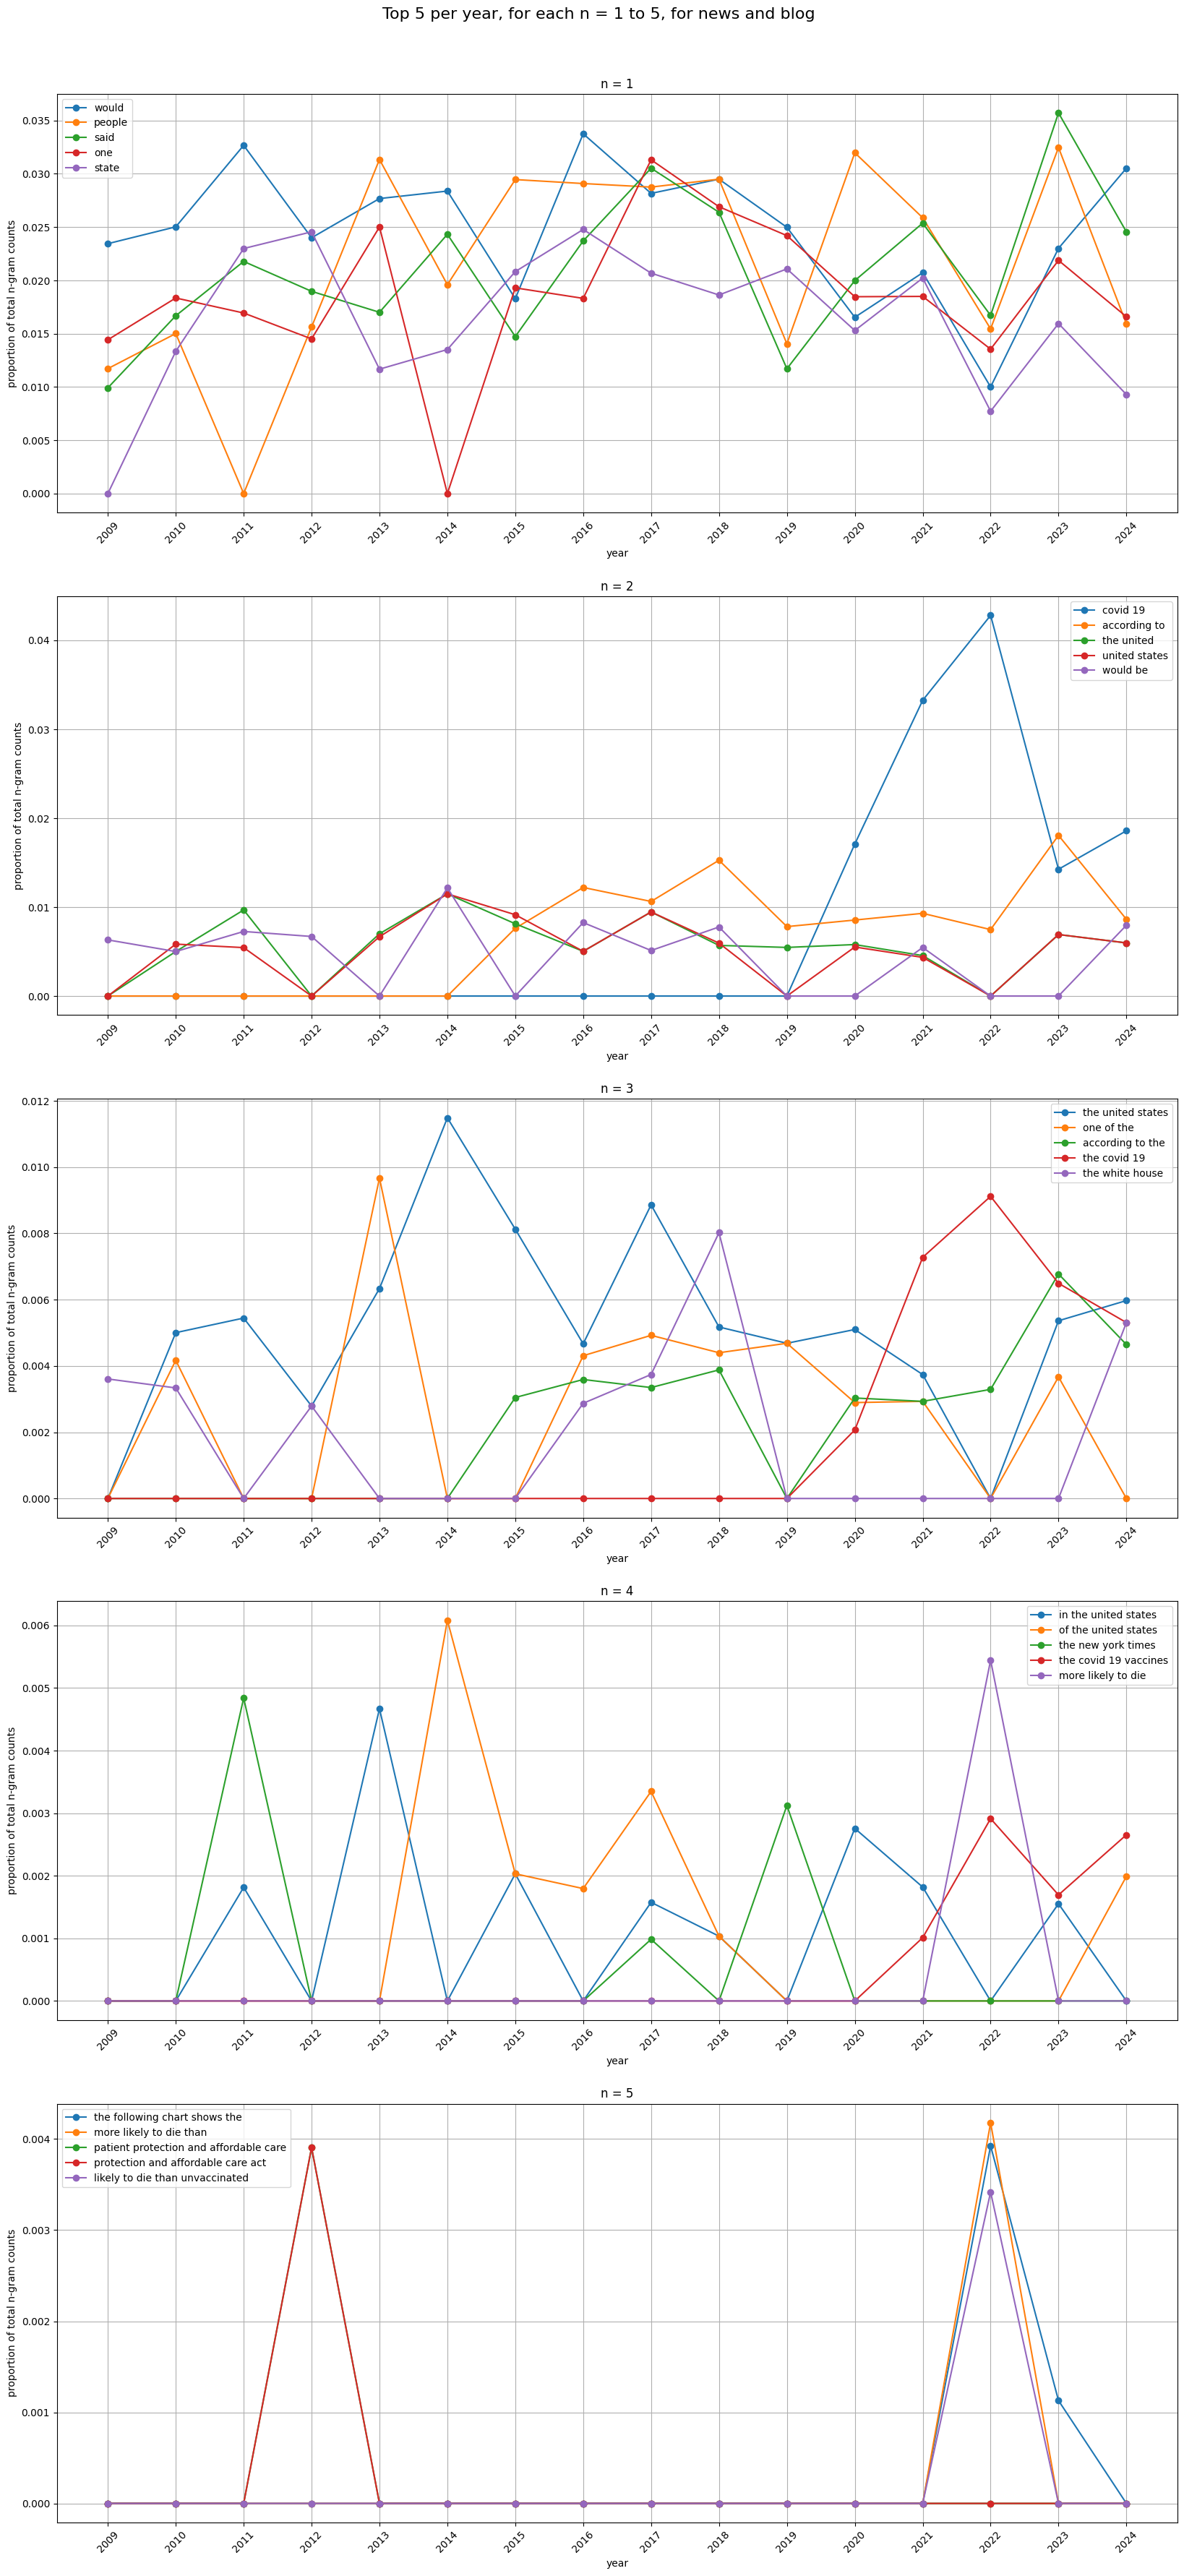

In [8]:
load_and_save_ngram_plots(
    misinfotext_path="./data/MisInfoText/Analysis_output/news_and_blog/MisInfoText_news_and_blog_ngrams.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/news_and_blog/Fakespeak_news_and_blog_ngrams.xlsx",
    title_template="Top NUM_NGRAMS per year, for each n = 1 to 5, for news and blog",
    save_path="./visualization/ngrams/plots_over_time/news_and_blog.png"
)

Press release

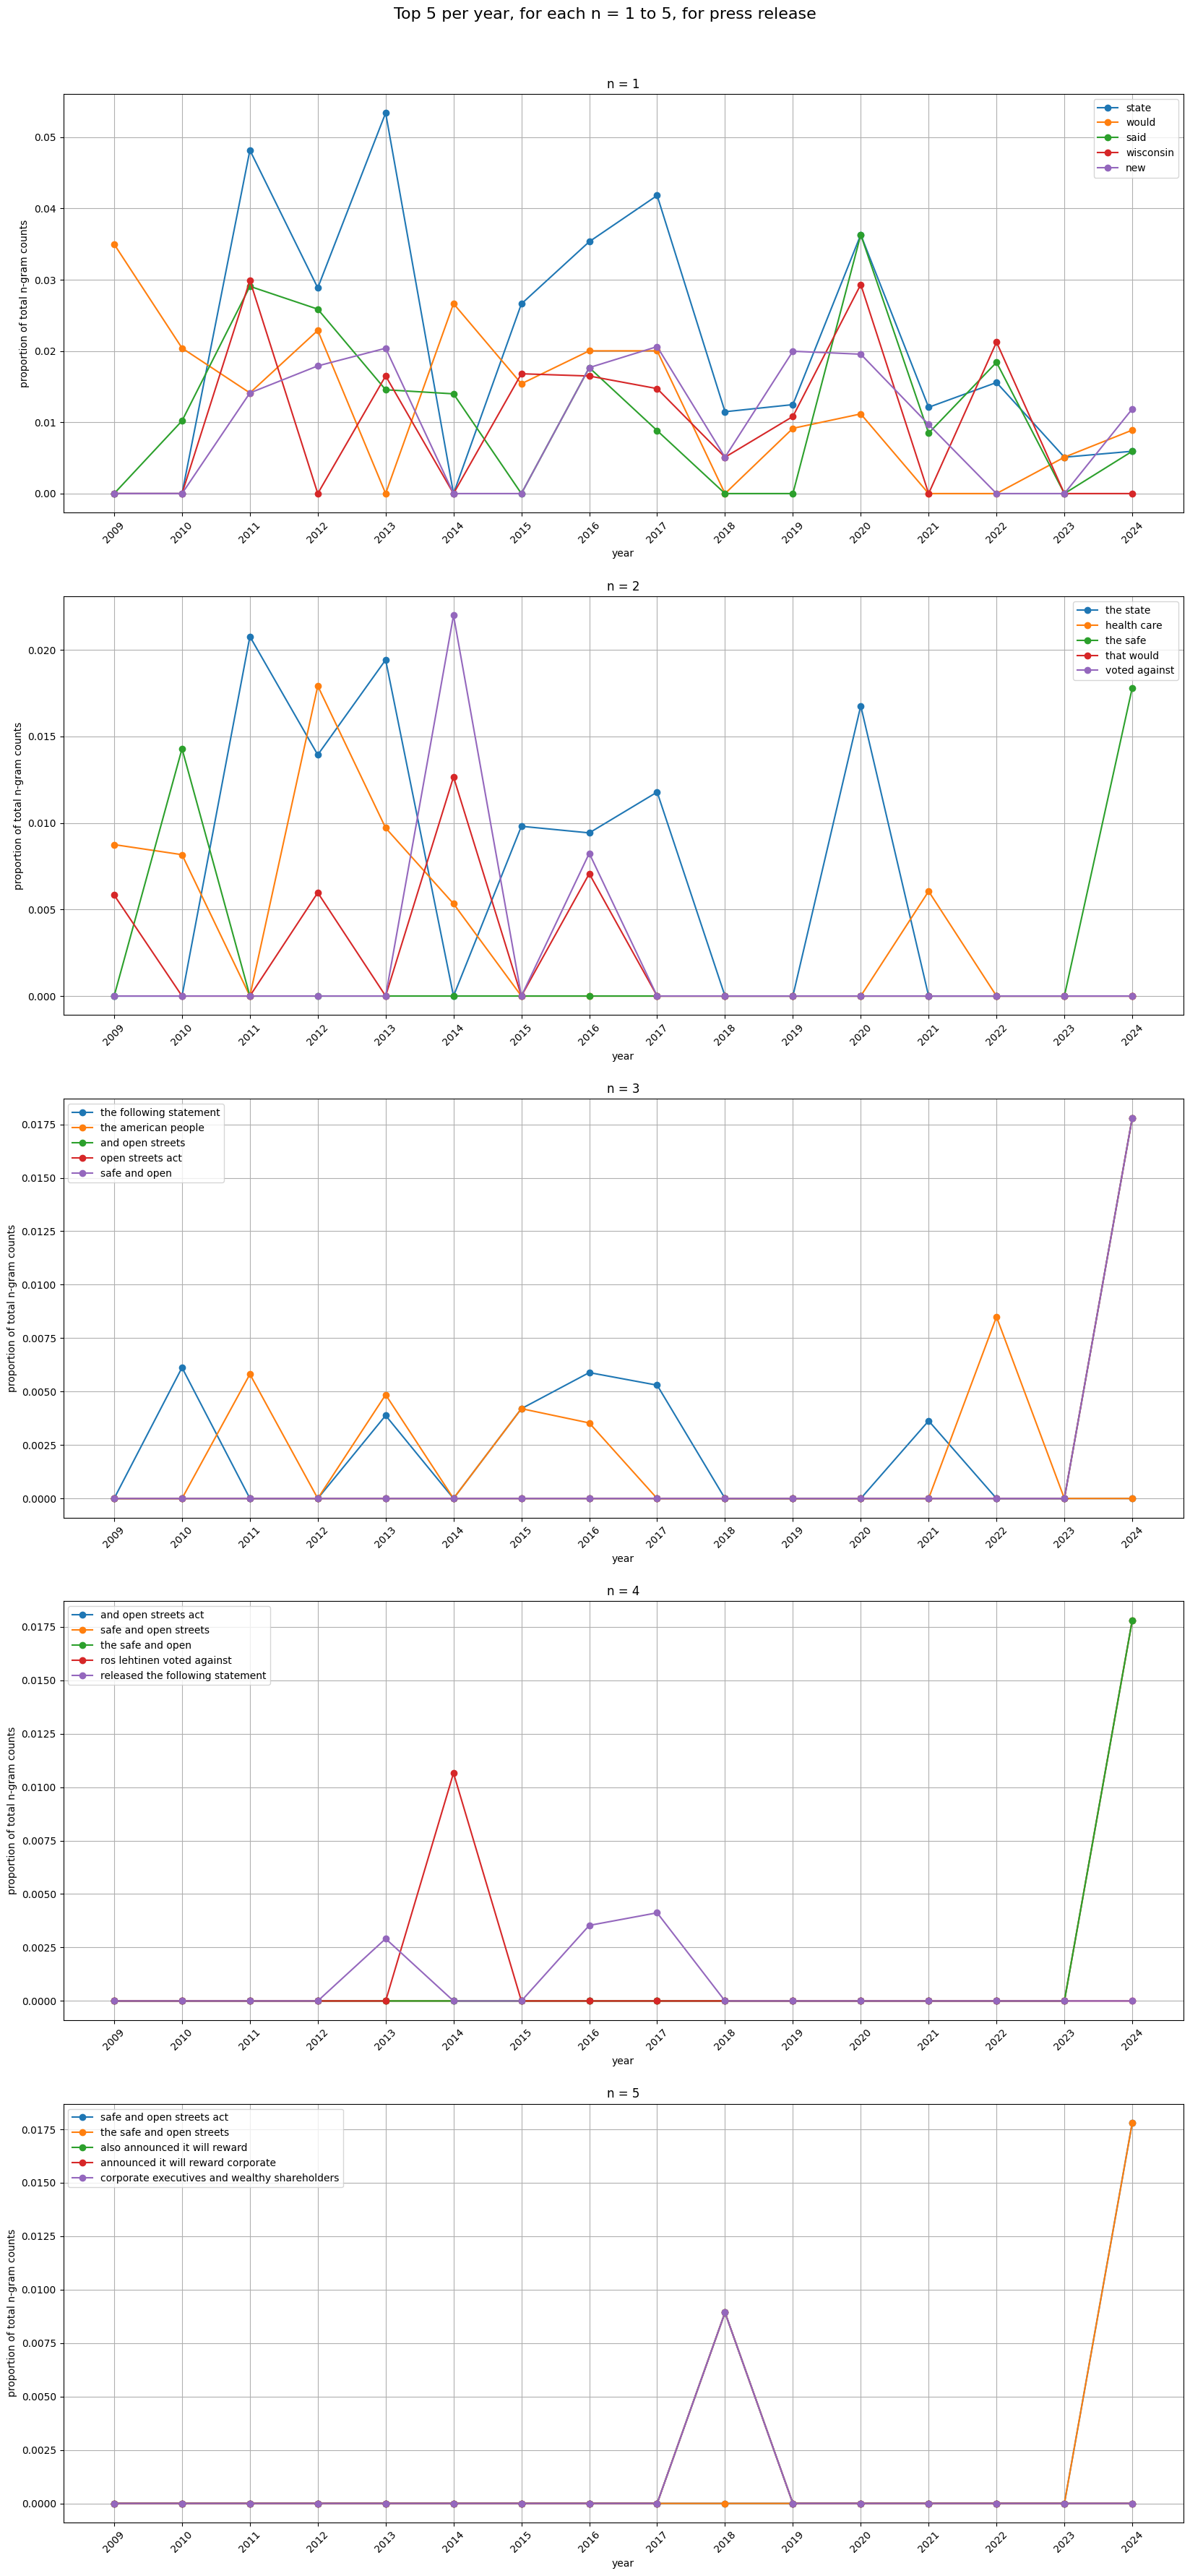

In [9]:
load_and_save_ngram_plots(
    misinfotext_path="./data/MisInfoText/Analysis_output/press_release/MisInfoText_press_release_ngrams.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/press_release/Fakespeak_press_release_ngrams.xlsx",
    title_template="Top NUM_NGRAMS per year, for each n = 1 to 5, for press release",
    save_path="./visualization/ngrams/plots_over_time/press_release.png"
)

Social media

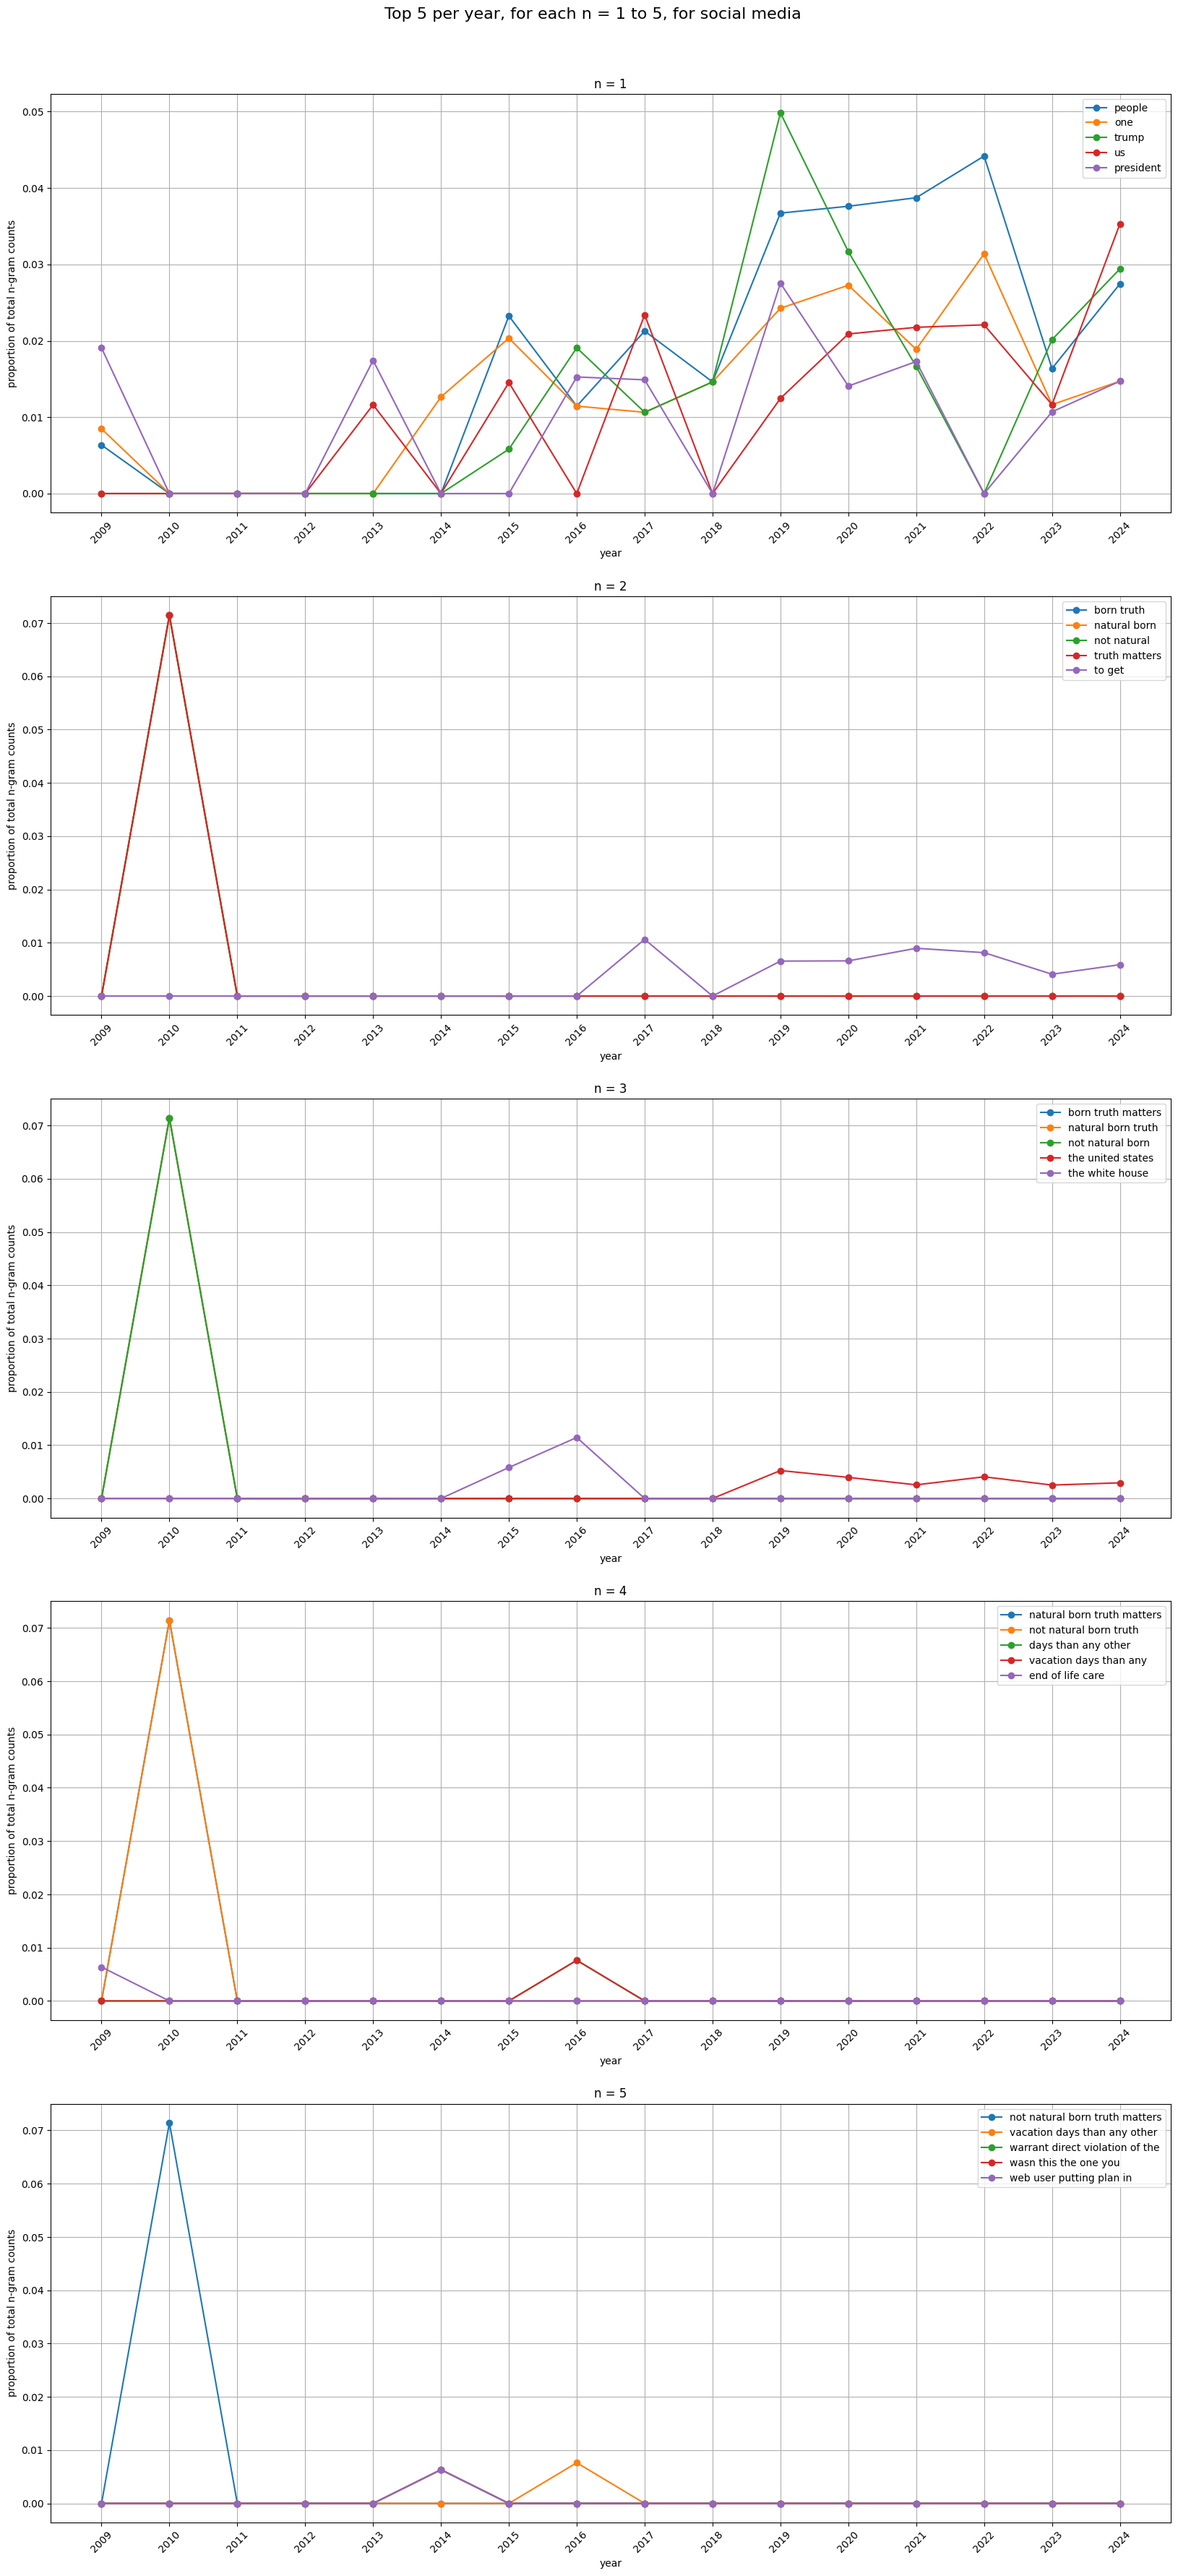

In [10]:
load_and_save_ngram_plots(
    misinfotext_path="./data/MisInfoText/Analysis_output/social_media/MisInfoText_social_media_ngrams.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/social_media/Fakespeak_social_media_ngrams.xlsx",
    title_template="Top NUM_NGRAMS per year, for each n = 1 to 5, for social media",
    save_path="./visualization/ngrams/plots_over_time/social_media.png"
)

### Generate wordclouds for ngrams in headline text

All text types

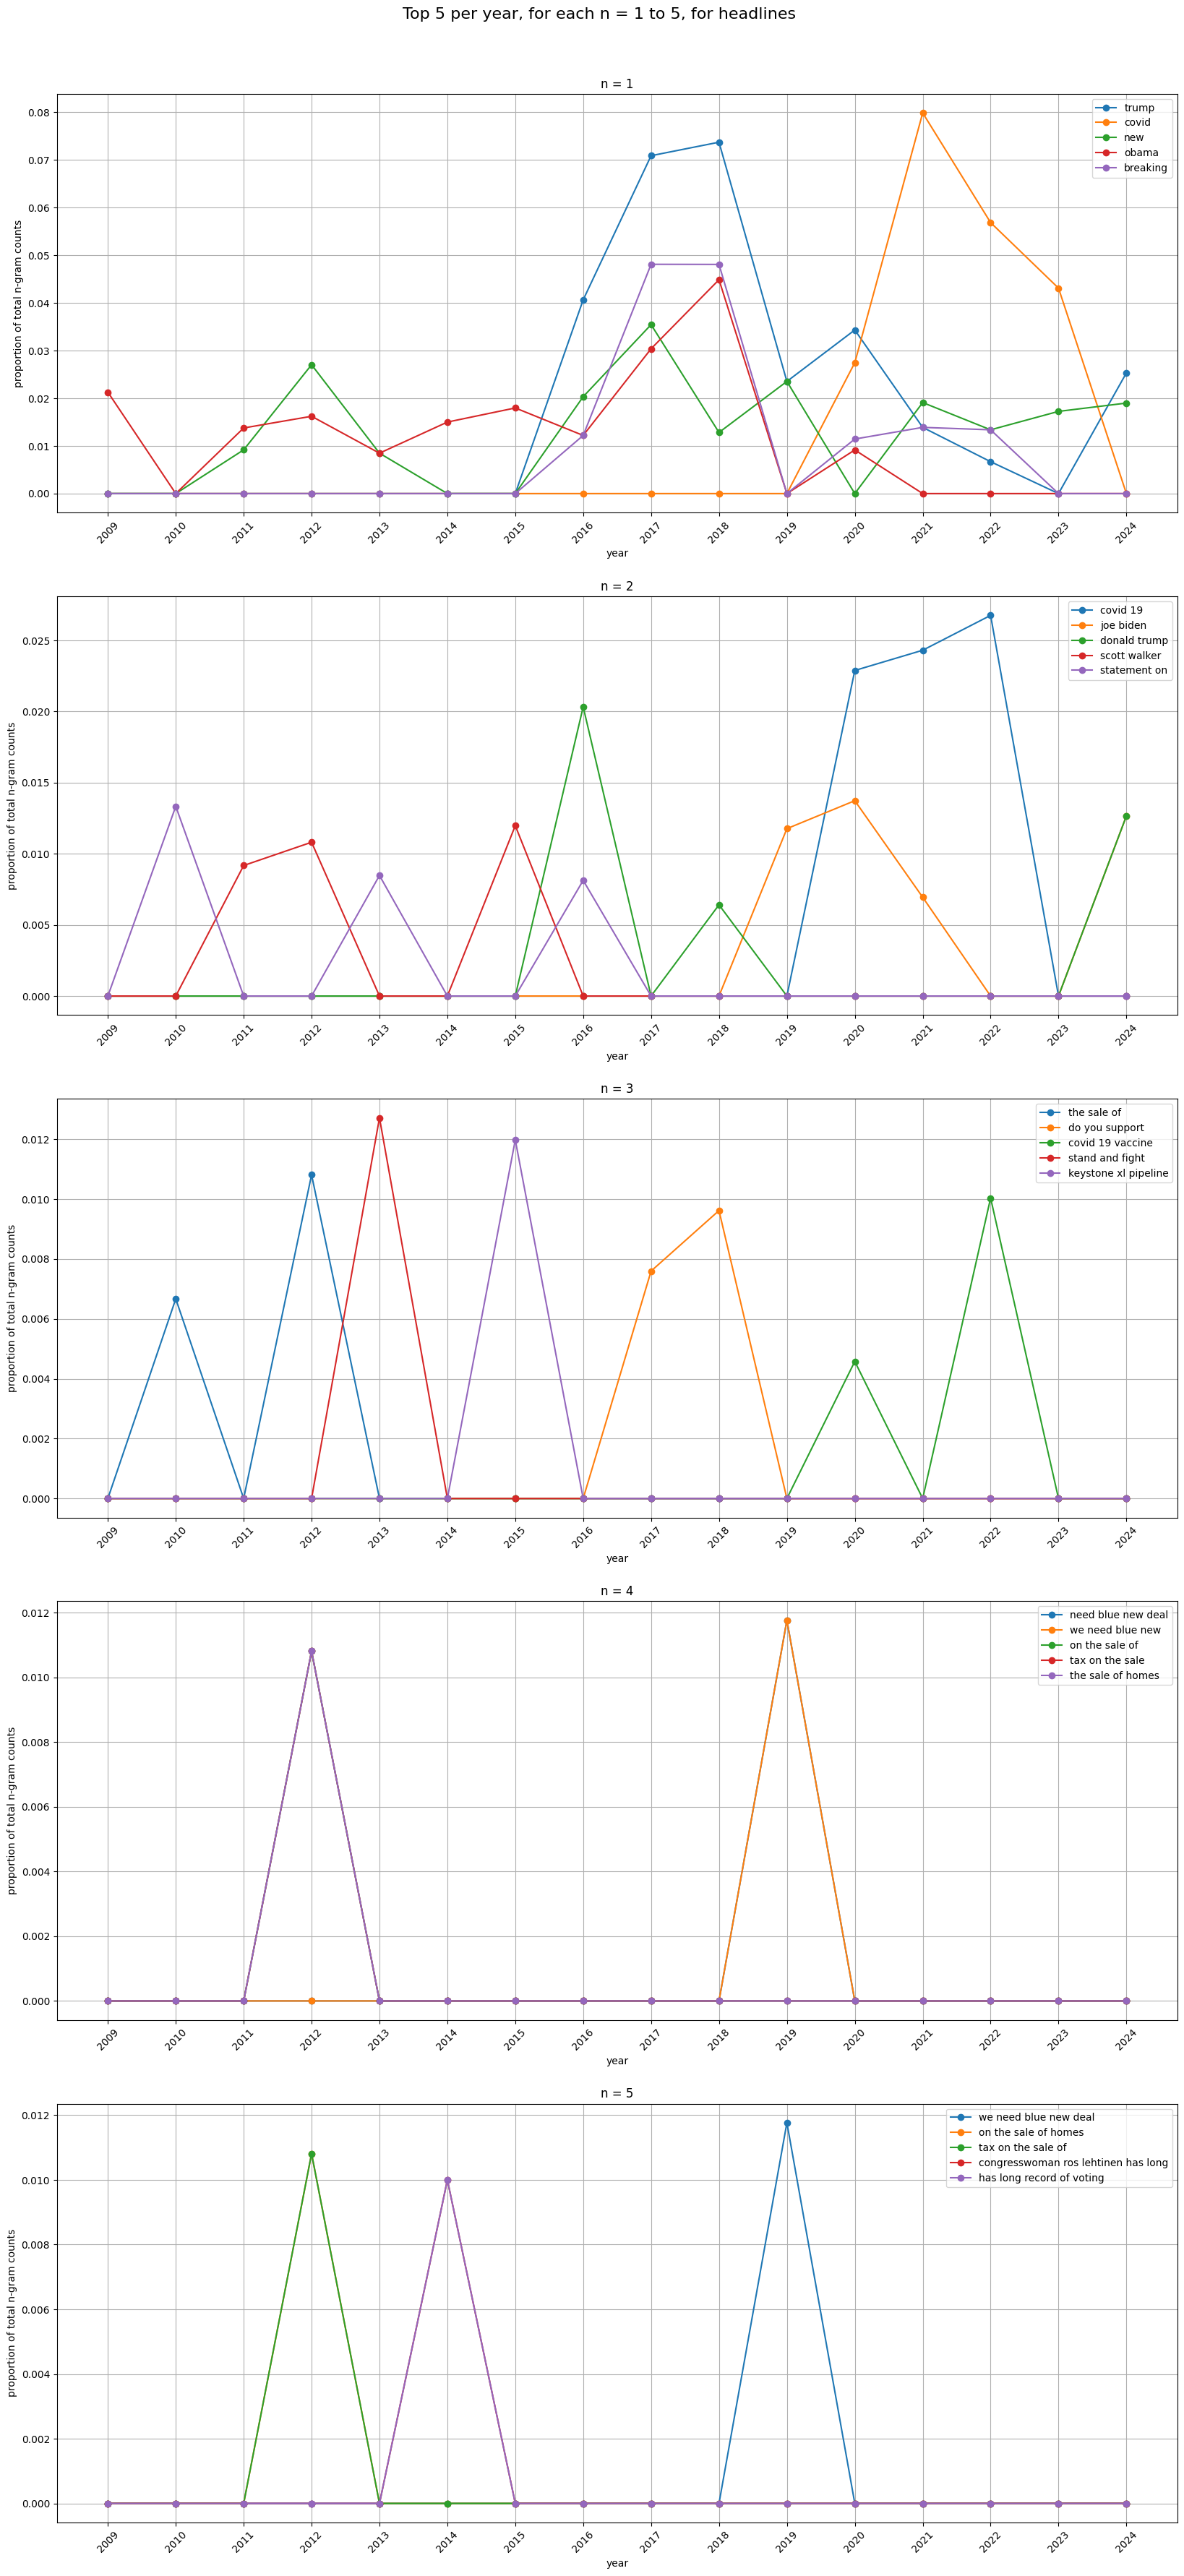

In [11]:
load_and_save_ngram_plots(
    misinfotext_path="./data/MisInfoText/Analysis_output/MisInfoText_ngrams_headlines.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/Fakespeak_ngrams_headlines.xlsx",
    title_template="Top NUM_NGRAMS per year, for each n = 1 to 5, for headlines",
    save_path="./visualization/ngrams/plots_over_time/full_headlines.png"
)

News and blog

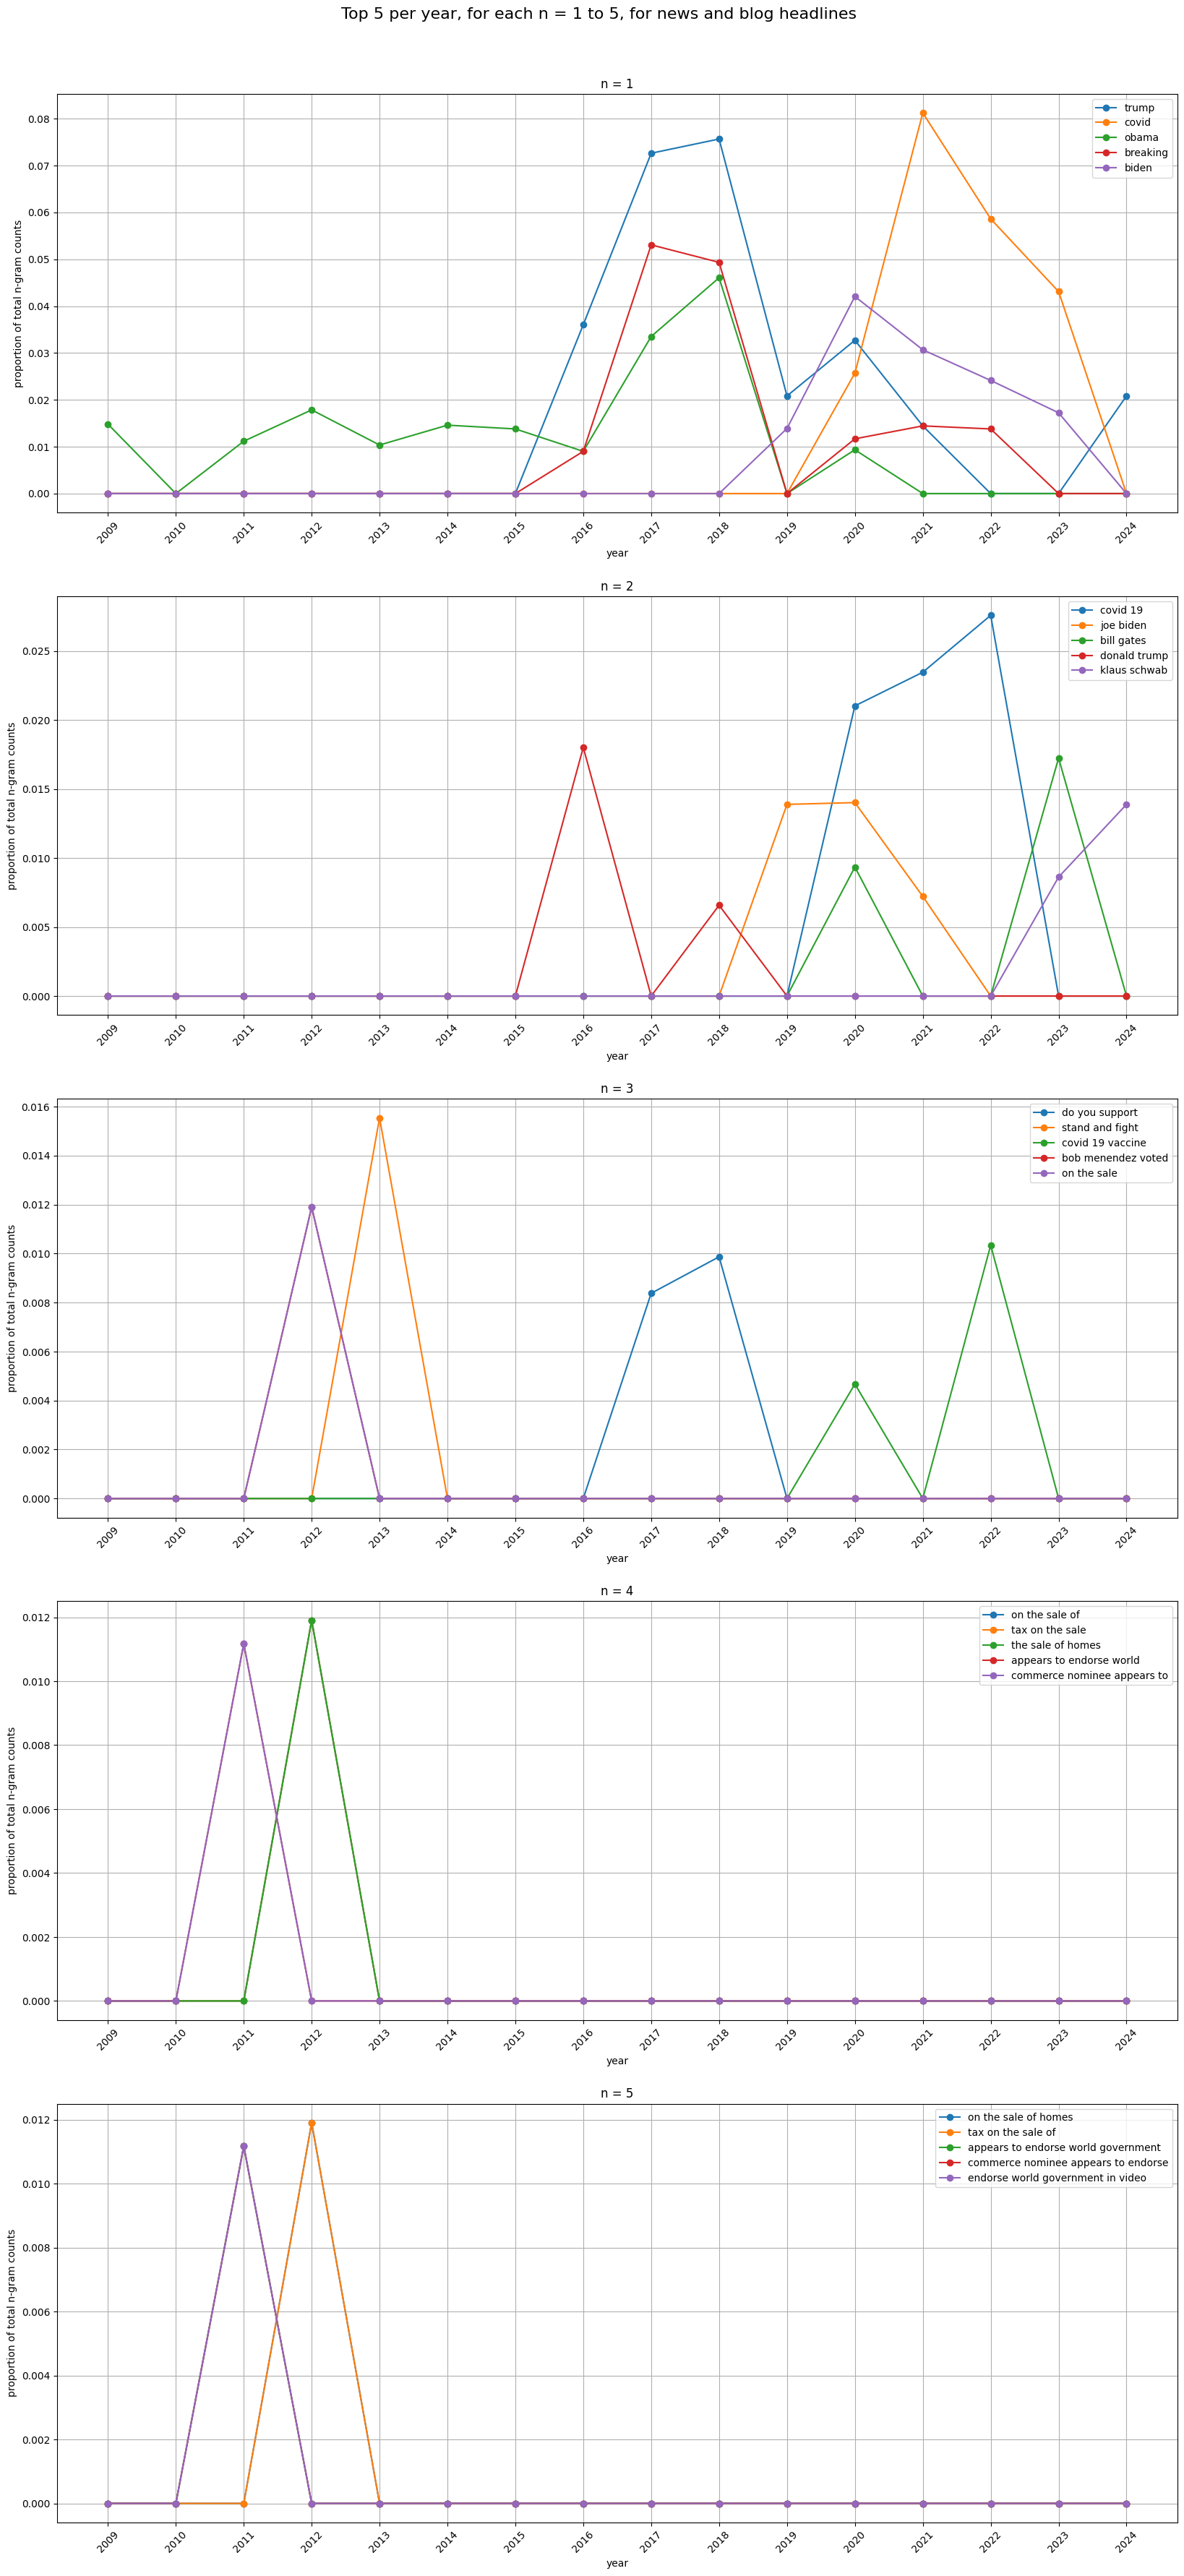

In [12]:
load_and_save_ngram_plots(
    misinfotext_path="./data/MisInfoText/Analysis_output/news_and_blog/MisInfoText_news_and_blog_ngrams_headlines.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/news_and_blog/Fakespeak_news_and_blog_ngrams_headlines.xlsx",
    title_template="Top NUM_NGRAMS per year, for each n = 1 to 5, for news and blog headlines",
    save_path="./visualization/ngrams/plots_over_time/news_and_blog_headlines.png"
)

Press release

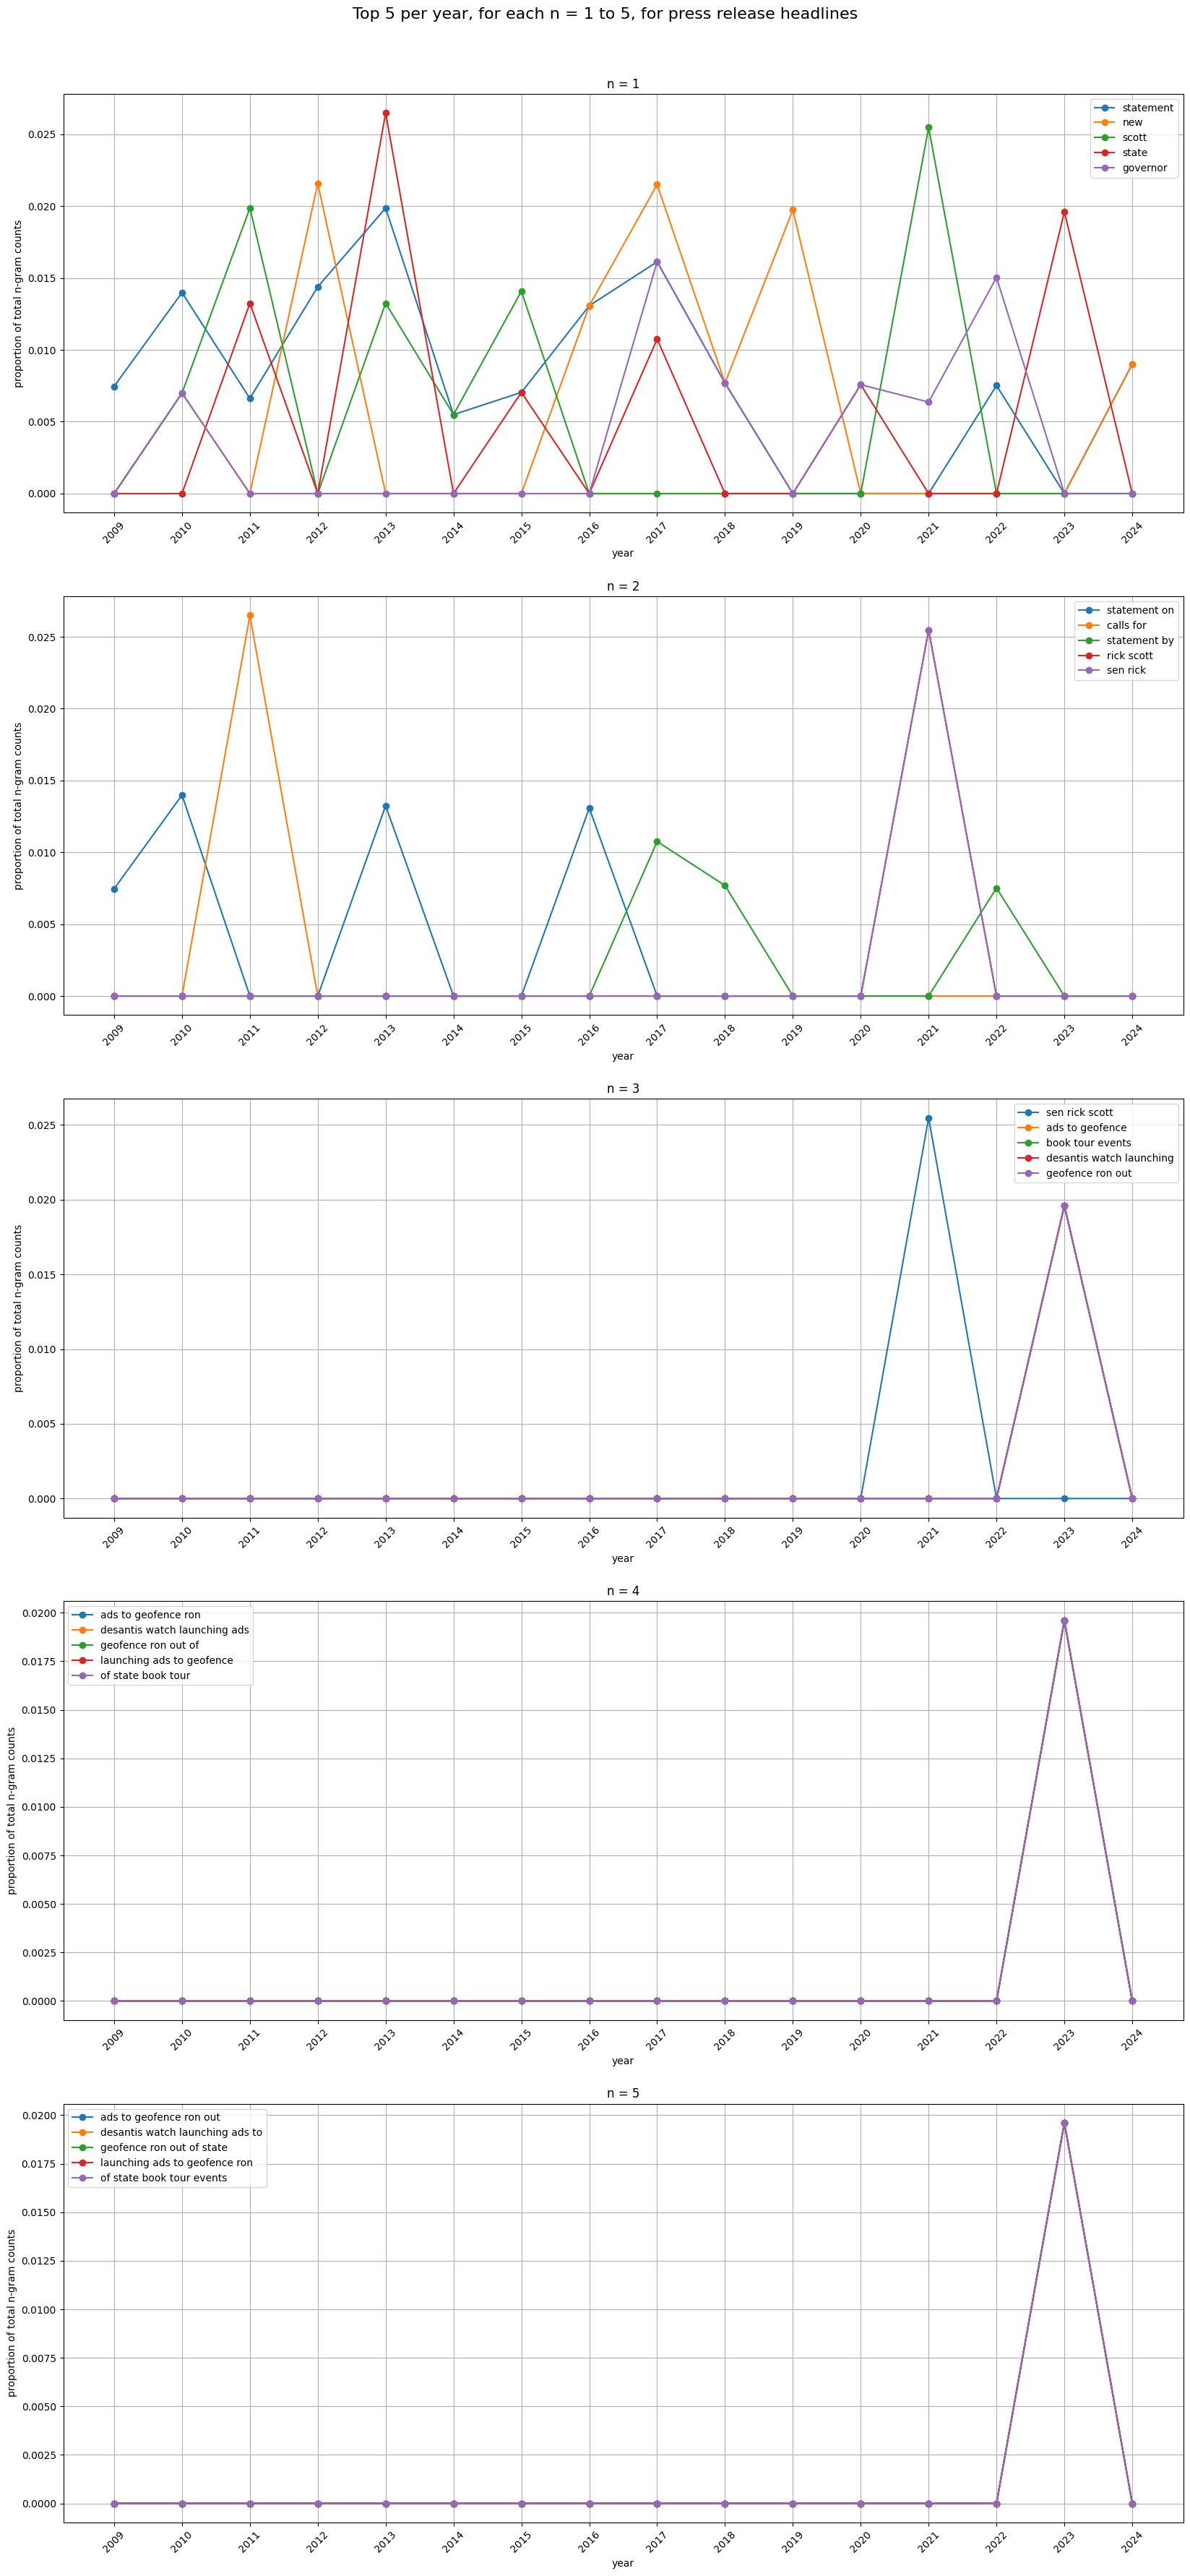

In [13]:
load_and_save_ngram_plots(
    misinfotext_path="./data/MisInfoText/Analysis_output/press_release/MisInfoText_press_release_ngrams_headlines.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/press_release/Fakespeak_press_release_ngrams_headlines.xlsx",
    title_template="Top NUM_NGRAMS per year, for each n = 1 to 5, for press release headlines",
    save_path="./visualization/ngrams/plots_over_time/press_release_headlines.png"
)

Social media (not very interesting because almost all social media articles don't have headlines)

C:\Users\Adam\AppData\Local\Temp\ipykernel_8116\1815665208.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(get_years_dfs(misinfotext_path, fakespeak_path))


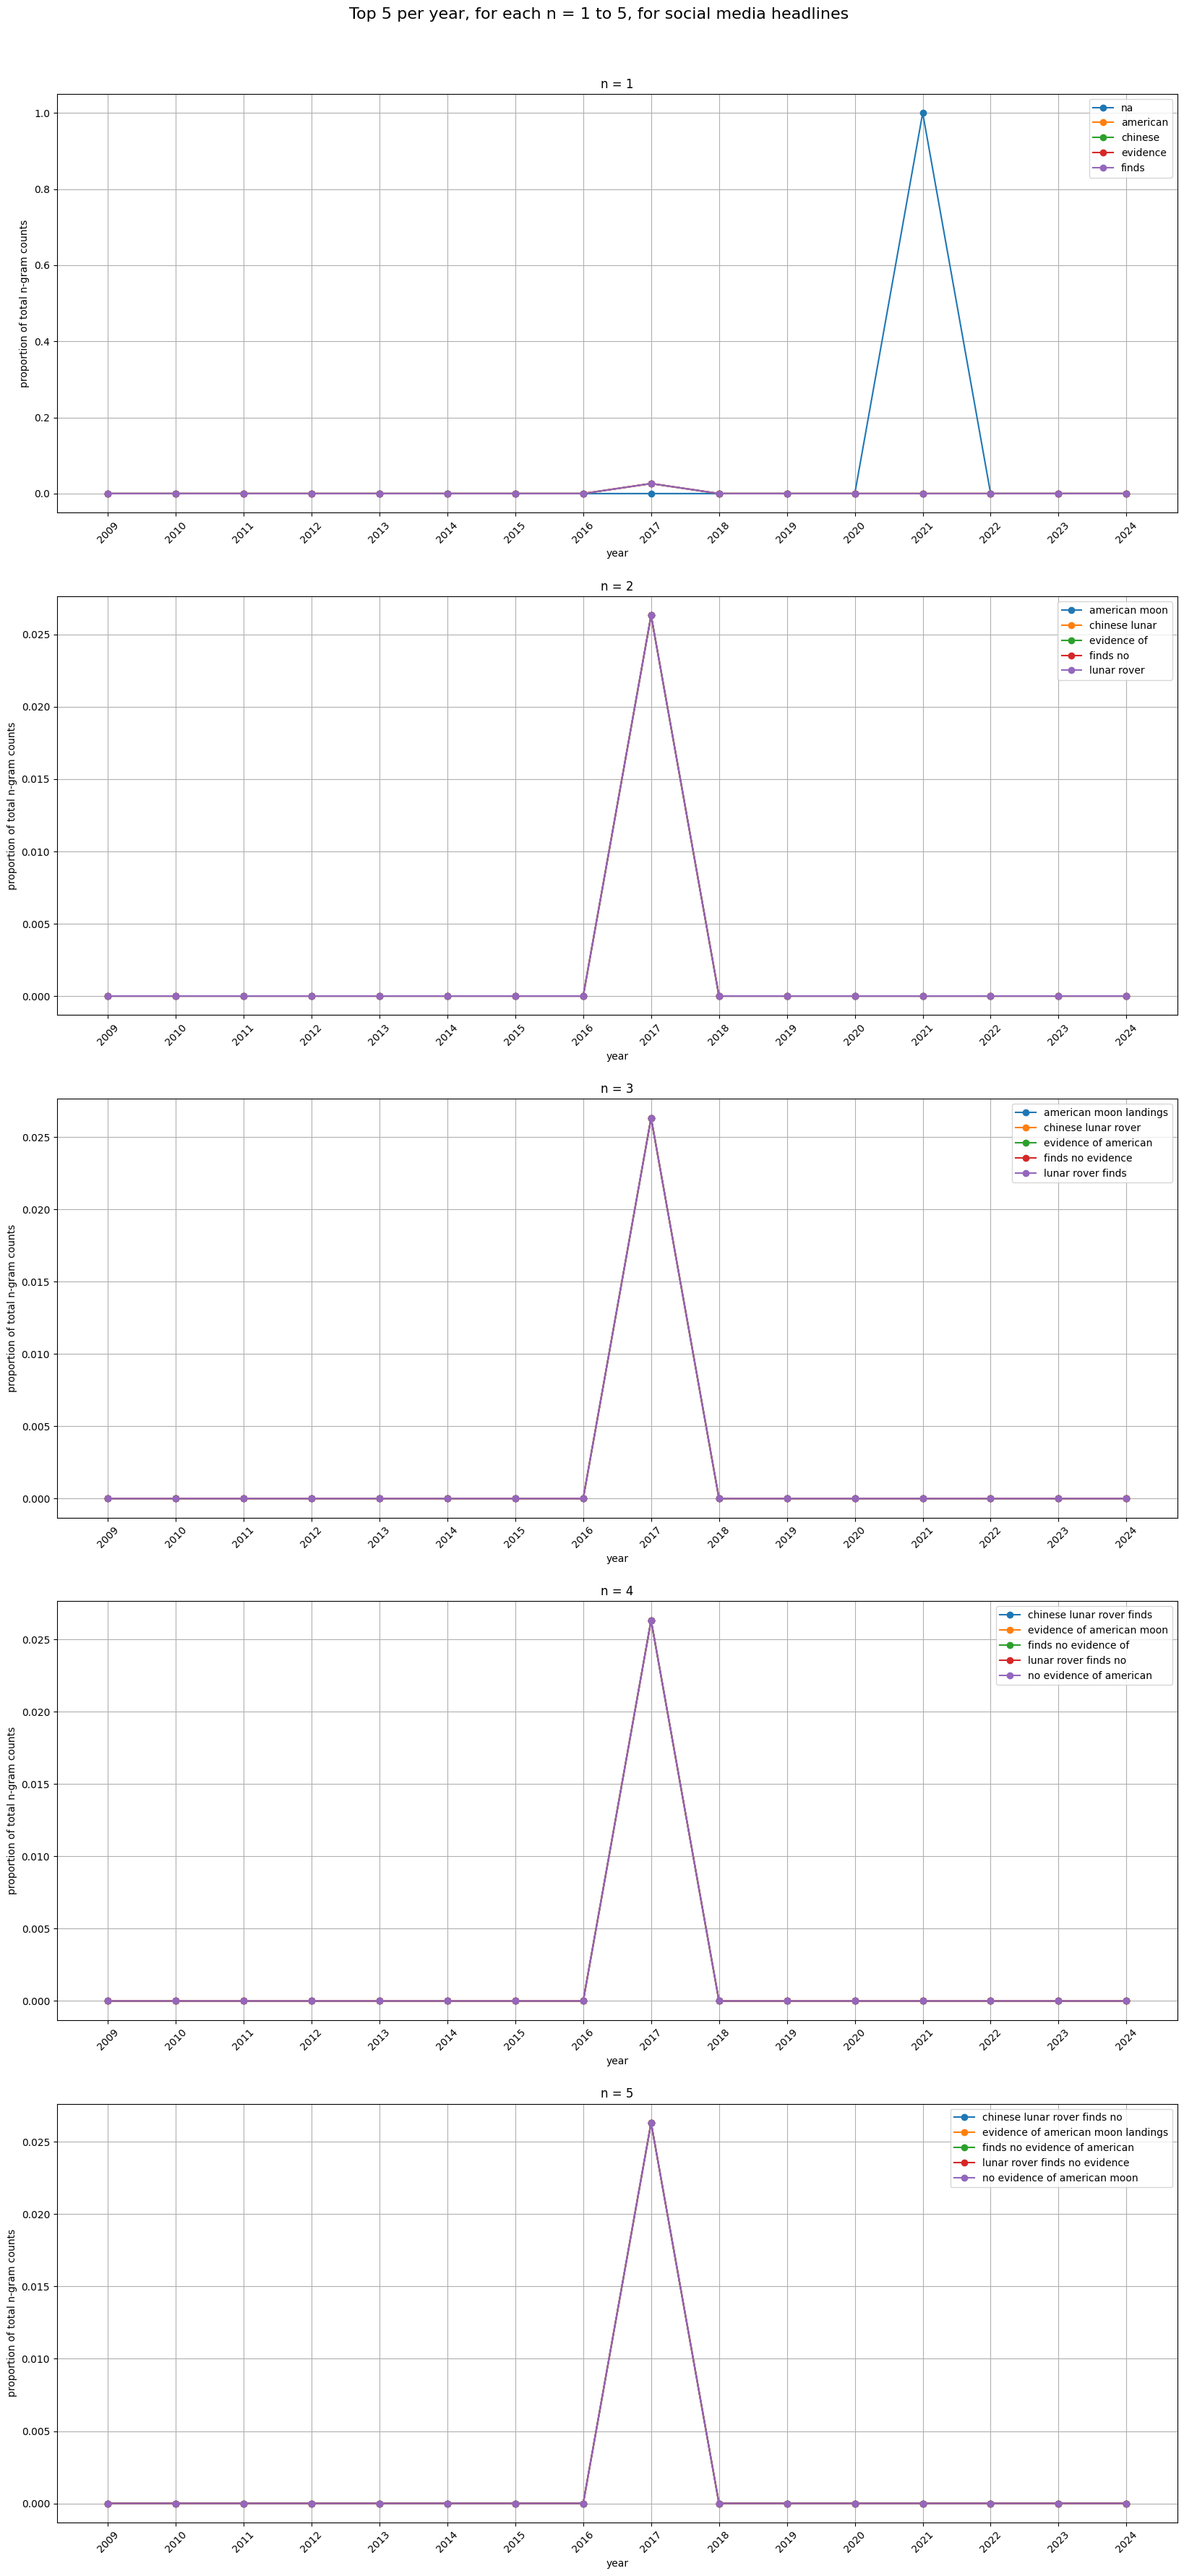

In [14]:
load_and_save_ngram_plots(
    misinfotext_path="./data/MisInfoText/Analysis_output/social_media/MisInfoText_social_media_ngrams_headlines.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/social_media/Fakespeak_social_media_ngrams_headlines.xlsx",
    title_template="Top NUM_NGRAMS per year, for each n = 1 to 5, for social media headlines",
    save_path="./visualization/ngrams/plots_over_time/social_media_headlines.png"
)